In [1]:
import numpy as np
import cvxpy as cp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
c=10
delta=0.1
d=2
m=15
n=25
a=np.zeros((m,d))
b=np.zeros((n,d))
a_=np.zeros(d)
b_=np.zeros(d)

Randomly fix the model parameters

In [3]:
np.random.seed(4)
A = np.random.randn(m,d,d)
for i in range(m):
    A[i] = A[i].T @ A[i]+delta*np.eye(d)
B = np.random.randn(n,d,d)
for i in range(n):
    B[i] = B[i].T @ B[i]+delta*np.eye(d)
for i in range(m):
    for k in range(d):
        a_[k]=c*np.sum(A[i,k,A[i,k]>0])
    a[i]=np.random.uniform(size=d)+a_  
for i in range(n):
    for k in range(d):
        b_[k]=c*np.sum(B[i,k,B[i,k]<0])
    b[i]=np.random.uniform(size=d)+b_

Division reactions

In [4]:
def x_tilde(A,a,lam):
    x = cp.Variable(d)
    constraints=[x>=0,x<=c]
    obj=(a-lam)@x-cp.quad_form(x,A)/2
    problem=cp.Problem(cp.Maximize(obj),constraints)
    #problem.solve(verbose=True)
    problem.solve()
    return x.value
def y_tilde(B,b,lam):
    y = cp.Variable(d)
    constraints=[y>=0,y<=c]
    obj=(lam-b)@y-cp.quad_form(y,B)/2
    problem=cp.Problem(cp.Maximize(obj),constraints)
    problem.solve()
    return y.value

The algorithm

In [5]:
T=500
lam=np.zeros(d)
lam_all=np.zeros((T,d))
z_all=np.zeros((T,d))
L=0
L_sqr=0
for t in range(T):
    x=np.zeros(d)
    for i in range(m):
        x+=x_tilde(A[i],a[i],lam)
    y=np.zeros(d)
    for i in range(n):
        y+=y_tilde(B[i],b[i],lam)
    L+=y-x
    L_sqr+=(y-x)**2
    lam=-L/np.sqrt(L_sqr)
    lam_all[t]=lam
    z_all[t]=y-x

Text(0.5, 1.0, 'Difference between supply and demand')

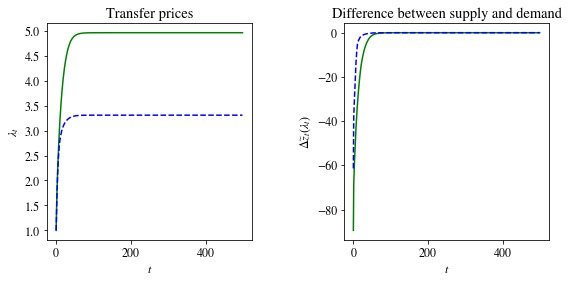

In [6]:
mpl.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(9,4))
fig.subplots_adjust(wspace=0.45)
axes[0].plot(lam_all[:,0], c='green')
axes[0].plot(lam_all[:,1], linestyle = 'dashed', c='blue')
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('$\lambda_t$')
axes[0].set_title('Transfer prices')
plt.plot(z_all[:,0], c='green')
plt.plot(z_all[:,1], linestyle = 'dashed', c='blue')
axes[1].set_xlabel('$t$')
axes[1].set_ylabel('$\Delta \widetilde z_t(\lambda_t)$')
axes[1].set_title('Difference between supply and demand')

In [7]:
fig.savefig('d_commodities_static.eps', dpi=600, bbox_inches='tight')